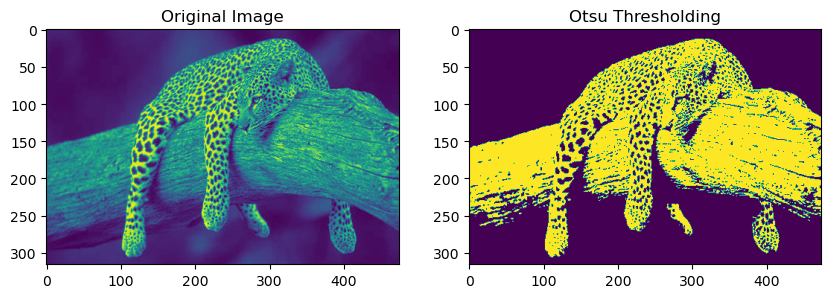

In [2]:
## Thresholding Based Image Segmentation::

##Otsu's Thresholding

import cv2
import matplotlib.pyplot as plt
import numpy as np

img=cv2.imread("C:\\Users\\M.Tech DS006\\Desktop\\OIP.jfif",0)

ret,thresh=cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(img)

plt.subplot(1,2,2)
plt.title("Otsu Thresholding")
plt.imshow(thresh)

plt.show()

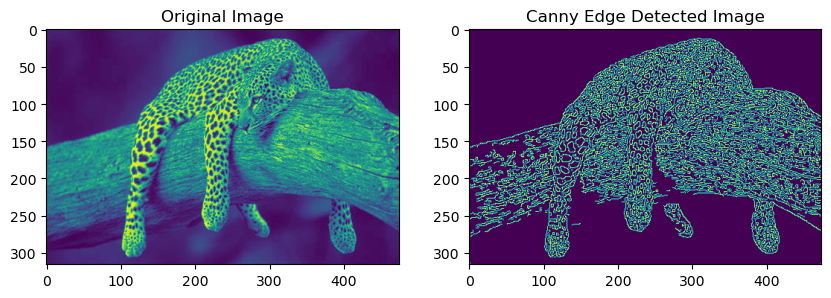

In [4]:
## Edge Based Segmentation 

## Canny Edge Detection

img=cv2.imread("C:\\Users\\M.Tech DS006\\Desktop\\OIP.jfif",0)

edges=cv2.Canny(img,100,200)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(img)

plt.subplot(1,2,2)
plt.title("Canny Edge Detected Image")
plt.imshow(edges)

plt.show()

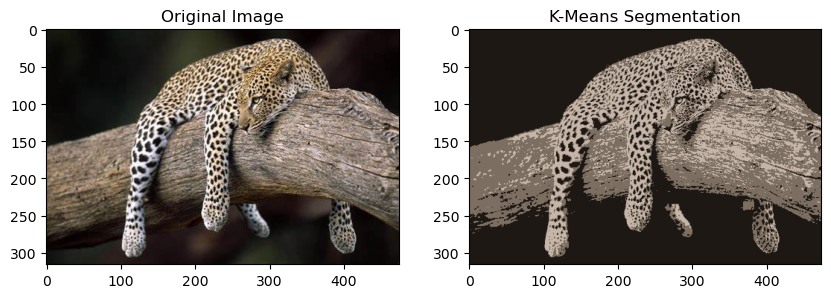

In [5]:
## Region Segmentaion using K-Means Clustering

import cv2
import matplotlib.pyplot as plt
import numpy as np

img=cv2.imread('C:\\Users\\M.Tech DS006\\Desktop\\OIP.jfif')
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

#Reshape the img to a 2D array of pixels
pixelVal=img.reshape((-1,3))
pixelVal=np.float32(pixelVal)

#Define Criteria and Apply K-means 
criteria=(cv2.TERM_CRITERIA_EPS+ cv2.TERM_CRITERIA_MAX_ITER,100,0.2)
k=3
_,labels,centers=cv2.kmeans(pixelVal,k,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

#Convert back to 8-bit Values
centers=np.uint8(centers)
labels=labels.flatten()

#Convert all Pixels to the color of the centroids
segmentedIMG=centers[labels.flatten()]
segmentedIMG=segmentedIMG.reshape(img.shape)


plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(img)

plt.subplot(1,2,2)
plt.title("K-Means Segmentation")
plt.imshow(segmentedIMG)

plt.show()

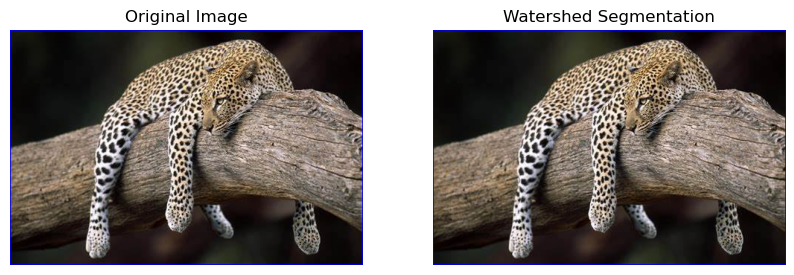

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('C:\\Users\\M.Tech DS006\\Desktop\\OIP.jfif')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Noise removal
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

# Sure background area
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers + 1

# Mark the region of unknown with zero
markers[unknown == 0] = 0

# Apply the Watershed algorithm
markers = cv2.watershed(image, markers)
image[markers == -1] = [255, 0, 0]

# Display the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Watershed Segmentation')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()
